In [1]:
import os
import re
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Baseline CNN Model

## Read

In [2]:
# Initialize an empty list to store the data
data_list = []
labels_list = []

# Iterate over each subfolder
train1_subfolders = [f.path for f in os.scandir('../data/Train1') if f.is_dir() ] # get all subfolders of the Train1 folder
train2_subfolders = [f.path for f in os.scandir('../data/Train2') if f.is_dir() ] # get all subfolders of the Train2 folder

train_subfolders = train1_subfolders + train2_subfolders # merge the two lists

for folder in train_subfolders:
    label = int(re.search(r'([1-9][0-9]{0,2})+$', folder).group(0)) # label for this image
    for file in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, file), 0)  # Load grayscale image
        data_list.append(img)
        labels_list.append(label)

## Preprocessing

In [3]:
# Convert lists to numpy arrays
X = np.array(data_list)
y = np.array(labels_list).reshape(-1, 1)

# Normalize the image data
X = X / 255.0

# Reshape X to add a channel dimension
X = X.reshape(-1, 128, 128, 1)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modell definition

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [5]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\szabo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Modell train

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 206s 153ms/step - accuracy: 0.5098 - loss: 1.9025 - val_accuracy: 0.8582 - val_loss: 0.4070
Epoch 2/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 203s 152ms/step - accuracy: 0.8028 - loss: 0.5776 - val_accuracy: 0.8736 - val_loss: 0.3283
Epoch 3/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 203s 152ms/step - accuracy: 0.8362 - loss: 0.4443 - val_accuracy: 0.8890 - val_loss: 0.2786
Epoch 4/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 201s 151ms/step - accuracy: 0.8596 - loss: 0.3684 - val_accuracy: 0.8883 - val_loss: 0.2636
Epoch 5/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 201s 151ms/step - accuracy: 0.8741 - loss: 0.3275 - val_accuracy: 0.9036 - val_loss: 0.2347
Epoch 6/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 213s 160ms/step - accuracy: 0.8863 - loss: 0.2897 - val_accuracy: 0.9088 - val_loss: 0.2268
Epoch 7/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 201s 151ms/step - accuracy: 0.8966 - loss: 0.2615 - val_accuracy: 0.9119 - val_loss: 0.2202
Epoch 8/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 201s 151ms/step - ac

In [7]:
# Make predictions
predictions = model.predict(X_test)

333/333 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step


## Accuracy

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score , classification_report


In [ ]:
predictions = model.predict(X_test)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Pontosság:", accuracy)

333/333 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step
Pontosság: 0.9196991067230842


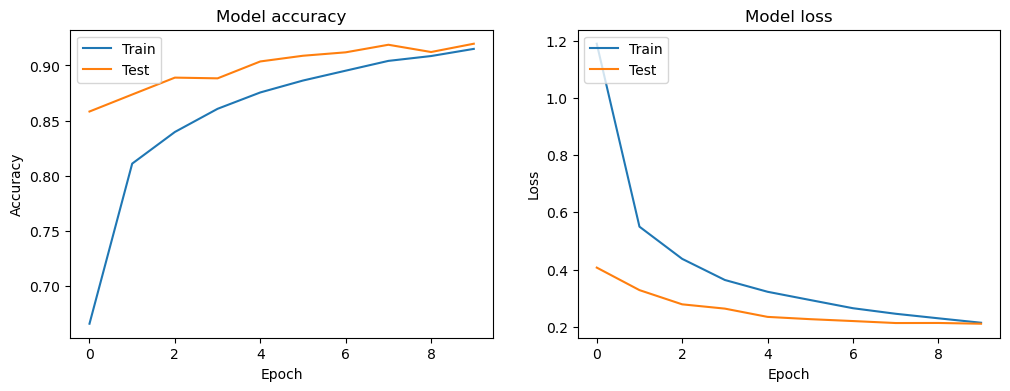

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Save - Load

In [ ]:
model.save('cnn_model.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('cnn_model.h5')

In [ ]:
predictions = loaded_model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(predictions, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Pontosság kiszámítása
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Pontosság:", accuracy)

# Részletes jelentés
print(classification_report(y_true_classes, y_pred_classes))

333/333 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step
Pontosság: 0.9196991067230842
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       190
           1       0.92      0.93      0.92       170
           2       0.98      1.00      0.99       159
           3       0.99      0.99      0.99       162
           4       1.00      1.00      1.00       176
           5       0.98      1.00      0.99       170
           6       0.98      0.99      0.98       166
           7       0.98      1.00      0.99       192
           8       1.00      0.99      1.00       208
           9       0.99      0.99      0.99       152
          10       1.00      1.00      1.00       183
          11       1.00      0.99      1.00       154
          12       0.90      0.66      0.76       183
          13       0.99      1.00      1.00       147
          14       1.00      0.99      1.00       146
          15       0.98      0.99      0.98       159
        

# Hyperparameter Optimizer

In [ ]:
import os
import re
import cv2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OneHotEncoder

2024-12-01 06:46:23.244384: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-01 06:46:23.346983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733035583.392220    2328 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733035583.406275    2328 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 06:46:23.504465: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Read

In [ ]:
data_list = []
labels_list = []

train1_subfolders = [f.path for f in os.scandir('../data/Train1') if f.is_dir()]
train2_subfolders = [f.path for f in os.scandir('../data/Train2') if f.is_dir()]

train_subfolders = train1_subfolders + train2_subfolders # merge the two lists

for folder in train_subfolders:
    label = int(re.search(r'([1-9][0-9]{0,2})+$', folder).group(0)) # label for this image
    for file in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, file), 0)  # Load grayscale image
        data_list.append(img)
        labels_list.append(label)

## Preprocessing

In [3]:
# Convert lists to numpy arrays
X = np.array(data_list)
y = np.array(labels_list).reshape(-1, 1)
del data_list
del labels_list

# Normalize the image data
X = X / 255.0

# Reshape X to add a channel dimension
X = X.reshape(-1, 128, 128, 1).astype('float32')

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (42537, 128, 128, 1)
Shape of X_test: (10635, 128, 128, 1)
Shape of y_train: (42537, 62)
Shape of y_test: (10635, 62)


## Hyperparameter Optimization with Three Convolutional Layers

In [ ]:
import tensorflow as tf
import keras_tuner as kt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [5]:
# Step 1: Define the model using a hyperparameter tuner
def build_model(hp):
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=16, max_value=64, step=16),
        kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(128, 128, 1)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Conv layer
    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Conv layer
    model.add(Conv2D(
        filters=hp.Int('conv3_filters', min_value=64, max_value=256, step=64),
        kernel_size=hp.Choice('conv3_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Dense layer
    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))
    model.add(Dropout(rate=hp.Choice('dropout_rate', values=[0.3, 0.5, 0.7])))

    # Output layer
    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Compile model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Step 2: Randomized search for hyperparameters
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='my_tuner_dir',
    project_name='character_recognition'
)

# Step 3: Search for the best hyperparameters
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Step 4: Get the best model and evaluate it
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of filters in the first conv layer is {best_hps.get('conv1_filters')},
in the second conv layer is {best_hps.get('conv2_filters')},
and in the third conv layer is {best_hps.get('conv3_filters')}.
The optimal kernel size for each conv layer is {best_hps.get('conv1_kernel')}, {best_hps.get('conv2_kernel')}, {best_hps.get('conv3_kernel')}.
The optimal number of units in the dense layer is {best_hps.get('dense_units')}.
The optimal dropout rate is {best_hps.get('dropout_rate')}.
The optimal optimizer is {best_hps.get('optimizer')}.
""")

Reloading Tuner from my_tuner_dir/character_recognition/tuner0.json

The optimal number of filters in the first conv layer is 48,
in the second conv layer is 96,
and in the third conv layer is 128.
The optimal kernel size for each conv layer is 5, 5, 5.
The optimal number of units in the dense layer is 256.
The optimal dropout rate is 0.3.
The optimal optimizer is rmsprop.



### Print Results

In [6]:
# Get the best trials
best_trials = tuner.oracle.get_best_trials(num_trials=5)
# Get the best models
best_models = tuner.get_best_models(num_models=5)

# Loop through both best trials and models
for i in range(len(best_trials)):
    # Access and print the validation score for the current trial
    validation_score = best_trials[i].score  # Validation score of the current trial
    print(f"Validation Score for Trial {i+1}: {validation_score}")

    # Access and print the summary of the corresponding best model
    print(f"Summary of Model for Trial {i+1}:")
    best_model = best_models[i]
    best_model.summary()  # Print model architecture

    print("-" * 50)  # Just a separator between trial summaries

/home/jupy/anaconda3/envs/amm/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/jupy/anaconda3/envs/amm/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/jupy/anaconda3/envs/amm/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Validation Score for Trial 1: 0.9244005680084229
Summary of Model for Trial 1:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 48)   │         1,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 96)     │       115,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │       307,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │        15,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,158,654 (19.68 MB)

 Trainable params: 5,158,654 (19.68 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------
Validation Score for Trial 2: 0.9238364100456238
Summary of Model for Trial 2:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 48)   │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 59, 59, 96)     │       115,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 27, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,003,518 (11.46 MB)

 Trainable params: 3,003,518 (11.46 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------
Validation Score for Trial 3: 0.9233662486076355
Summary of Model for Trial 3:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 48)   │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │        15,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,540,766 (24.95 MB)

 Trainable params: 6,540,766 (24.95 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------
Validation Score for Trial 4: 0.9212976098060608
Summary of Model for Trial 4:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 64)   │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 27, 192)    │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32448)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,153,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,589,438 (17.51 MB)

 Trainable params: 4,589,438 (17.51 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------
Validation Score for Trial 5: 0.9200752377510071
Summary of Model for Trial 5:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 192)            │     2,408,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │        11,966 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,466,974 (9.41 MB)

 Trainable params: 2,466,974 (9.41 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------


## Hyperparameter Optimization with Four Convolutional Layers

In [7]:
from keras.callbacks import EarlyStopping

In [8]:
# Step 1: Define the model using a hyperparameter tuner
def build_model2(hp):
    model = Sequential()
    
    # First conv layer
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=16, max_value=64, step=16),
        kernel_size=hp.Choice('conv2_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(128, 128, 1)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Conv layer (filters >= conv1_filters and <= 128)
    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Conv layer (filters >= conv2_filters and <= 256)
    model.add(Conv2D(
        filters=hp.Int('conv3_filters', min_value=64, max_value=256, step=64),
        kernel_size=hp.Choice('conv3_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fourth Conv layer (filters >= conv3_filters and <= 512)
    model.add(Conv2D(
        filters=hp.Int('dense_units', min_value=128, max_value=512, step=128),
        kernel_size=hp.Choice('conv4_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Dense layer (64, 128, 192, 256 units)
    dense_units = hp.Int('dense_units', min_value=128, max_value=512, step=128)
    model.add(Dense(units=dense_units, activation='relu'))

    # Dropout layer (0.3, 0.5, 0.7 rates)
    dropout_rate = hp.Choice('dropout_rate', values=[0.3, 0.5, 0.7])
    model.add(Dropout(rate=dropout_rate))

    # Output layer
    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Compile model
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
# Step 1: Hyperband tuner
tuner = kt.Hyperband(
    build_model2,
    objective='val_accuracy',
    max_epochs=12,  # Maximum number of epochs
    factor=2,  # Reduce the number of models by a factor of 2 at each step
    directory='hyperband_dir',
    project_name='character_recognition'
)

# Step 2: Early stopping for faster tuning
stop_early = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Step 3: Start the search
tuner.search(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=3,  # Initial epochs for early-stage evaluation
    batch_size=32,
    callbacks=[stop_early],
    verbose=1  # To get more detailed output
)

# Step 4: Get the best hyperparameters and evaluate
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of filters in the first conv layer is {best_hps.get('conv1_filters')},
in the second conv layer is {best_hps.get('conv2_filters')},
in the third conv layer is {best_hps.get('conv3_filters')},
and in the fourth conv layer is {best_hps.get('dense_units')}.

The optimal kernel size for each conv layer is {best_hps.get('conv2_kernel')}, {best_hps.get('conv2_kernel')}, {best_hps.get('conv3_kernel')}, {best_hps.get('conv4_kernel')}.

The optimal number of units in the dense layer is {best_hps.get('dense_units')}.
The optimal dropout rate is {best_hps.get('dropout_rate')}.
The optimal optimizer is {best_hps.get('optimizer')}.
""")

Reloading Tuner from hyperband_dir/character_recognition/tuner0.json

The optimal number of filters in the first conv layer is 64,
in the second conv layer is 64,
in the third conv layer is 64,
and in the fourth conv layer is 512.

The optimal kernel size for each conv layer is 3, 3, 3, 5.

The optimal number of units in the dense layer is 512.
The optimal dropout rate is 0.3.
The optimal optimizer is adam.



In [10]:
# Get the best trials
best_trials = tuner.oracle.get_best_trials(num_trials=5)
# Get the best models
best_models = tuner.get_best_models(num_models=5)

# Loop through both best trials and models
for i in range(len(best_trials)):
    # Access and print the validation score for the current trial
    validation_score = best_trials[i].score  # Validation score of the current trial
    print(f"Validation Score for Trial {i+1}: {validation_score}")

    # Access and print the summary of the corresponding best model
    print(f"Summary of Model for Trial {i+1}:")
    best_model = best_models[i]
    best_model.summary()  # Print model architecture

    print("-" * 50)  # Just a separator between trial summaries


/home/jupy/anaconda3/envs/amm/lib/python3.12/site-packages/keras_tuner/src/tuners/hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
/home/jupy/anaconda3/envs/amm/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Validation Score for Trial 1: 0.9277856349945068
Summary of Model for Trial 1:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 512)    │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │        31,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,480,126 (28.53 MB)

 Trainable params: 7,480,126 (28.53 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------
Validation Score for Trial 2: 0.9274094700813293
Summary of Model for Trial 2:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 48)   │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │        13,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 192)    │       153,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 512)    │       885,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │        31,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,639,294 (29.14 MB)

 Trainable params: 7,639,294 (29.14 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------
Validation Score for Trial 3: 0.9252468347549438
Summary of Model for Trial 3:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 16)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 64)     │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │        31,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,407,262 (28.26 MB)

 Trainable params: 7,407,262 (28.26 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------
Validation Score for Trial 4: 0.9245886206626892
Summary of Model for Trial 4:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 256)    │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 512)      │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │        31,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,965,886 (30.39 MB)

 Trainable params: 7,965,886 (30.39 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------
Validation Score for Trial 5: 0.9204513430595398
Summary of Model for Trial 5:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 512)    │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │        31,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,480,126 (28.53 MB)

 Trainable params: 7,480,126 (28.53 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------


# Train And Evaluate The Best Model

In [11]:
# Step 1: Split the data into train + temp (temp will later be split into validation and unseen test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Step 2: Split temp into validation and unseen test sets (50% of temp goes to validation and 50% to unseen test)
X_val, X_unseen_test, y_val, y_unseen_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of X_unseen_test: {X_unseen_test.shape}")

Shape of X_train: (42537, 128, 128, 1)
Shape of X_val: (5317, 128, 128, 1)
Shape of X_unseen_test: (5318, 128, 128, 1)


In [16]:
# Define the CNN model
model = Sequential([
    Input(shape=(128, 128, 1)),  
    # conv 1
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # conv 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    # conv 3
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # conv 4
    Conv2D(512, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Early Stopping Callback
from keras.callbacks import EarlyStopping

# EarlyStopping monitoring 'val_accuracy' (stopping if accuracy does not improve)
early_stopping_accuracy = EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)

# Fit the model with both early stopping callbacks
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    validation_data=(X_val, y_val), 
    batch_size=32, 
    callbacks=[early_stopping_accuracy]
)

# Save the trained model
model.save('best_model.h5')
model.save('best_model.keras')

# After training, evaluate on a separate, completely unseen test set
test_loss, test_accuracy = model.evaluate(X_unseen_test, y_unseen_test, verbose=2)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/20
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 75s 55ms/step - accuracy: 0.5332 - loss: 1.7902 - val_accuracy: 0.8638 - val_loss: 0.3486
Epoch 2/20
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 72s 54ms/step - accuracy: 0.8571 - loss: 0.3793 - val_accuracy: 0.8967 - val_loss: 0.2510
Epoch 3/20
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 70s 53ms/step - accuracy: 0.8846 - loss: 0.2873 - val_accuracy: 0.8860 - val_loss: 0.2560
Epoch 4/20
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 71s 53ms/step - accuracy: 0.9007 - loss: 0.2436 - val_accuracy: 0.9107 - val_loss: 0.2104
Epoch 5/20
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 69s 52ms/step - accuracy: 0.9095 - loss: 0.2161 - val_accuracy: 0.9139 - val_loss: 0.2107
Epoch 6/20
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 73s 55ms/step - accuracy: 0.9138 - loss: 0.2079 - val_accuracy: 0.9188 - val_loss: 0.2013
Epoch 7/20
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 71s 54ms/step - accuracy: 0.9233 - loss: 0.1903 - val_accuracy: 0.9259 - val_loss: 0.1925
Epoch 8/20
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 71s 53ms/step - accuracy: 0.9295 -

167/167 - 3s - 19ms/step - accuracy: 0.9293 - loss: 0.1955
Test Loss: 0.1954764872789383, Test Accuracy: 0.9292967319488525


    Epoch 13 has been chosen as the best state

In [25]:
model.save('best_model.h5')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score , classification_report

In [ ]:
predictions = model.predict(X_val)

# Valószínűségi értékek osztálycímkékké alakítása
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_val, axis=1)

# Pontosság kiszámítása
accuracy = accuracy_score(true_classes, predicted_classes)
print(classification_report(true_classes, predicted_classes))
print("Pontosság:", accuracy)

167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        95
           1       0.97      0.91      0.94        86
           2       1.00      1.00      1.00        68
           3       1.00      0.99      0.99        84
           4       1.00      1.00      1.00        89
           5       0.99      1.00      0.99        90
           6       1.00      0.99      0.99        84
           7       1.00      0.99      0.99        99
           8       0.99      1.00      1.00       108
           9       0.99      0.97      0.98        79
          10       1.00      0.99      0.99        89
          11       1.00      1.00      1.00        82
          12       0.86      0.77      0.81        86
          13       1.00      1.00      1.00        76
          14       1.00      0.99      0.99        68
          15       1.00      1.00      1.00        82
          16       0.99      1.00      

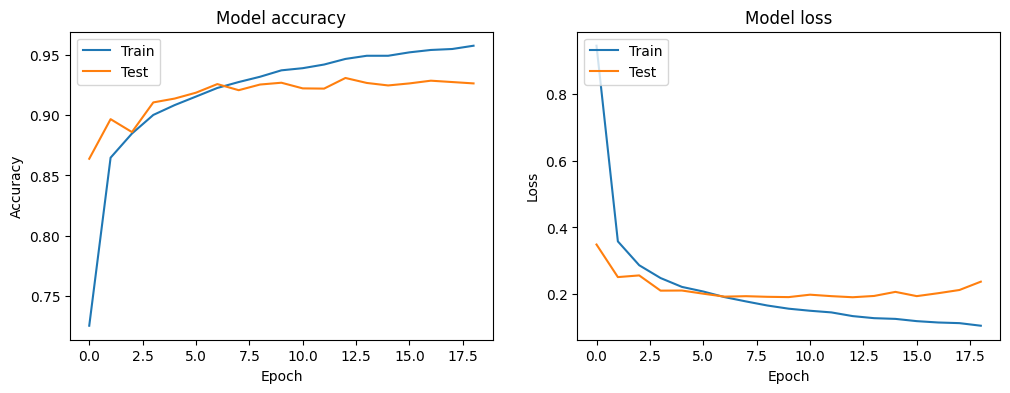

In [22]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Prediction on the Test Dataset

In [2]:
import os
import cv2
import numpy as np
from keras.models import load_model

## Read Test Data

In [2]:
# Step 1: Define the path to the TestData folder
test_data_path = '../data/TestData'

# Step 2: List all image files in the TestData folder
test_images = [f for f in os.listdir(test_data_path) if f.endswith('.png')]

# Step 3: Prepare the images for prediction
test_data = []

for file in test_images:
    # Read the image in grayscale
    img = cv2.imread(os.path.join(test_data_path, file), 0)
    
    # Resize the image to 128x128 if needed (not required if already the correct size)
    if img.shape != (128, 128):
        img = cv2.resize(img, (128, 128))
    
    # Normalize the pixel values
    img = img / 255.0
    
    # Add channel dimension (1 for grayscale)
    img = img.reshape(128, 128, 1)
    
    # Append to the test data list
    test_data.append(img)

# Convert the list to a numpy array
X_test_data = np.array(test_data)

## Predict

In [3]:
import tensorflow as tf
# Step 4: Load the trained model
model = tf.keras.models.load_model('../models/best_model.h5')   

2024-12-02 12:26:12.358362: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# check the model architecture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 10, 10, 512)    │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 62)             │        31,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,480,128 (28.53 MB)

 Trainable params: 7,480,126 (28.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [4]:
# Step 5: Make predictions
predictions = model.predict(X_test_data)

# Convert predictions from one-hot encoding to class indices
predicted_classes = np.argmax(predictions, axis=1)

2024-12-02 12:26:17.465908: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 465305600 exceeds 10% of free system memory.


222/222 ━━━━━━━━━━━━━━━━━━━━ 31s 141ms/step


In [5]:
# Step 6: Write the predictions to a .txt file
output_file = '../predictions/predictions_best_model.csv'
with open(output_file, 'w') as f:
    # Write header
    f.write("class;TestImage\n")
    
    # Write predictions
    for file, pred_class in zip(test_images, predicted_classes):
        # Add 1 to the class index to match the original class labels
        f.write(f"{pred_class+1};{file}\n")

print(f"Predictions have been saved to {output_file}")

Predictions have been saved to ../predictions/predictions_best_model.csv
